In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [4]:
df.isnull().mean()*100

Unnamed: 0     0.0
ID             0.0
class          0.0
20150720_N     7.0
20150602_N    15.0
20150517_N    10.0
20150501_N    12.0
20150415_N     6.0
20150330_N    14.0
20150314_N     9.0
20150226_N    17.0
20150210_N     8.0
20150125_N    13.0
20150109_N    11.0
20141117_N    16.0
20141101_N     5.0
20141016_N    18.0
20140930_N    10.0
20140813_N     7.0
20140626_N    20.0
20140610_N     6.0
20140525_N     9.0
20140509_N    11.0
20140423_N    22.0
20140407_N     8.0
20140322_N    14.0
20140218_N    18.0
20140202_N     7.0
20140117_N    15.0
20140101_N     5.0
dtype: float64

In [5]:
df = df.drop(columns=['Unnamed: 0','ID'])
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,-1325.640,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.640,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,-3162.140,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.400,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,1242.870,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,943.698,944.619,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,1401.970,1372.680,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,NaN,2693.630,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,770.469,NaN,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [6]:
# Create both mean and median filled columns for all numeric columns
for col in df.select_dtypes(include=['number']).columns:
    df[f'{col}_mean'] = df[col].fillna(df[col].mean(numeric_only=True))
    df[f'{col}_median'] = df[col].fillna(df[col].median(numeric_only=True))


In [7]:
df.isnull().mean()*100

class                 0.0
20150720_N            7.0
20150602_N           15.0
20150517_N           10.0
20150501_N           12.0
                     ... 
20140202_N_median     0.0
20140117_N_mean       0.0
20140117_N_median     0.0
20140101_N_mean       0.0
20140101_N_median     0.0
Length: 82, dtype: float64

In [8]:
df.columns

Index(['class', '20150720_N', '20150602_N', '20150517_N', '20150501_N',
       '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N',
       '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N',
       '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N',
       '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N',
       '20140202_N', '20140117_N', '20140101_N', '20150720_N_mean',
       '20150720_N_median', '20150602_N_mean', '20150602_N_median',
       '20150517_N_mean', '20150517_N_median', '20150501_N_mean',
       '20150501_N_median', '20150415_N_mean', '20150415_N_median',
       '20150330_N_mean', '20150330_N_median', '20150314_N_mean',
       '20150314_N_median', '20150226_N_mean', '20150226_N_median',
       '20150210_N_mean', '20150210_N_median', '20150125_N_mean',
       '20150125_N_median', '20150109_N_mean', '20150109_N_median',
       '20141117_N_mean', '20141117_N_median', '20141101_N_mean',
       '20141101

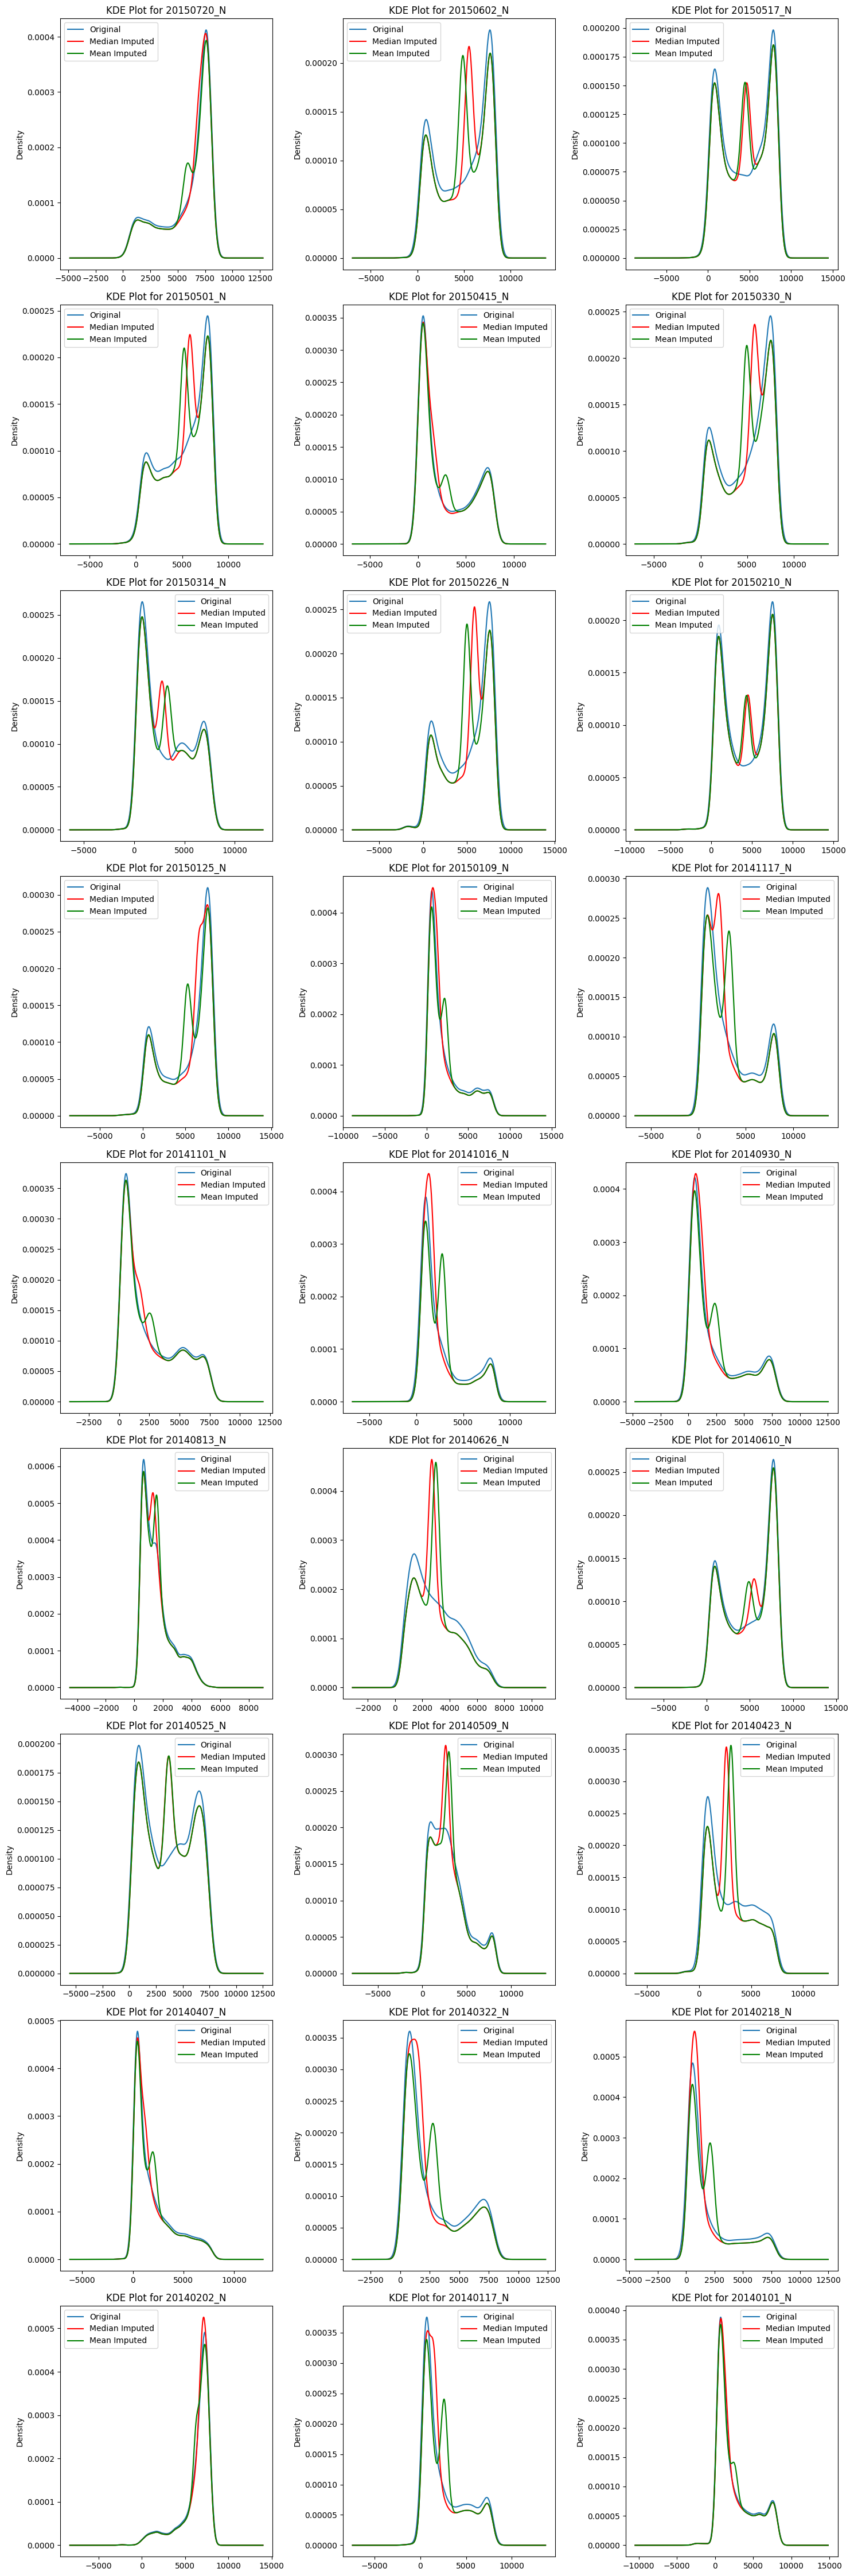

In [9]:
# Get original numeric columns (excluding the _mean and _median columns)
original_cols = [col for col in df.select_dtypes(include=['number']).columns 
                 if not col.endswith('_mean') and not col.endswith('_median')]

# Create subplots
n_cols = 3  # Number of columns in subplot grid
n_rows = (len(original_cols) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(original_cols):
    ax = axes[i]
    
    # Original variable distribution
    df[col].plot(kind='kde', ax=ax, label='Original')
    
    # Variable imputed with median (if exists)
    if f'{col}_median' in df.columns:
        df[f'{col}_median'].plot(kind='kde', ax=ax, color='red', label='Median Imputed')
    
    # Variable imputed with mean (if exists)
    if f'{col}_mean' in df.columns:
        df[f'{col}_mean'].plot(kind='kde', ax=ax, color='green', label='Mean Imputed')
    
    ax.set_title(f'KDE Plot for {col}')
    ax.legend()

# Hide empty subplots
for i in range(len(original_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


### Median imputation is generally the better choice here, as it introduces less bias and preserves the original data characteristics more faithfully, which is beneficial for model performance and generalization.

In [10]:
# mean_cols = [col for col in df.columns if col.endswith('_mean')]
# df = df[['class'] + mean_cols]
median_cols = [col for col in df.columns if col.endswith('_median')]
df = df[['class'] + median_cols]


In [11]:
df

,class,20150720_N_median,20150602_N_median,20150517_N_median,20150501_N_median,20150415_N_median,20150330_N_median,20150314_N_median,20150226_N_median,20150210_N_median,...,20140610_N_median,20140525_N_median,20140509_N_median,20140423_N_median,20140407_N_median,20140322_N_median,20140218_N_median,20140202_N_median,20140117_N_median,20140101_N_median
0,water,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.990,630.087,5831.120,-1325.640,...,5484.905,-1043.160,-1942.490,267.138,1183.715,1599.385,211.3280,-2203.020,-1180.19,433.906
1,water,634.2400,593.705,-1625.790,-1672.320,914.198,-692.386,707.626,-1670.590,-1408.640,...,5484.905,-933.934,-625.385,120.059,364.858,476.972,220.8780,-2250.000,-1360.56,524.075
2,water,58.0174,-1599.160,4672.000,-1052.630,1586.240,-1564.630,2802.010,729.790,-3162.140,...,-1025.880,368.622,2633.695,-1227.800,304.621,1599.385,369.2140,-2202.120,1521.21,-1343.550
3,water,72.5180,5513.375,380.436,-1256.930,515.805,-1413.180,-802.942,683.254,-2829.400,...,-1813.950,155.624,2633.695,-924.073,432.150,282.833,298.3200,-2197.360,1521.21,-826.727
4,water,1136.4400,5513.375,4672.000,1647.830,1935.800,5742.485,2158.980,5831.120,1242.870,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.6500,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,impervious,1207.7000,984.620,4672.000,1166.250,937.478,1072.700,823.896,943.698,944.619,...,1117.740,1176.600,1044.110,2624.125,369.082,465.843,362.8820,979.795,1521.21,433.659
7996,impervious,2170.3500,1419.720,1361.000,1478.710,983.911,1262.110,1422.860,1401.970,1372.680,...,984.634,2128.970,1379.660,2624.125,762.633,485.204,446.7240,771.747,1589.06,506.936
7997,impervious,1895.6800,1454.740,4672.000,1033.560,1930.380,1057.150,1471.600,5831.120,2693.630,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.0000,1818.650,2501.72,1247.770
7998,impervious,3465.7400,1283.320,413.412,4391.050,1146.820,4473.050,1614.750,770.469,4497.485,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,969.7115,3759.710,1521.21,388.346


In [12]:
df.isnull().mean()*100

class                0.0
20150720_N_median    0.0
20150602_N_median    0.0
20150517_N_median    0.0
20150501_N_median    0.0
20150415_N_median    0.0
20150330_N_median    0.0
20150314_N_median    0.0
20150226_N_median    0.0
20150210_N_median    0.0
20150125_N_median    0.0
20150109_N_median    0.0
20141117_N_median    0.0
20141101_N_median    0.0
20141016_N_median    0.0
20140930_N_median    0.0
20140813_N_median    0.0
20140626_N_median    0.0
20140610_N_median    0.0
20140525_N_median    0.0
20140509_N_median    0.0
20140423_N_median    0.0
20140407_N_median    0.0
20140322_N_median    0.0
20140218_N_median    0.0
20140202_N_median    0.0
20140117_N_median    0.0
20140101_N_median    0.0
dtype: float64

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df.head()

/tmp/ipykernel_13/2851579229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = encoder.fit_transform(df['class'])


,class,20150720_N_median,20150602_N_median,20150517_N_median,20150501_N_median,20150415_N_median,20150330_N_median,20150314_N_median,20150226_N_median,20150210_N_median,...,20140610_N_median,20140525_N_median,20140509_N_median,20140423_N_median,20140407_N_median,20140322_N_median,20140218_N_median,20140202_N_median,20140117_N_median,20140101_N_median
0,5,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,5831.120,-1325.64,...,5484.905,-1043.160,-1942.490,267.138,1183.715,1599.385,211.328,-2203.020,-1180.19,433.906
1,5,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.64,...,5484.905,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,5,58.0174,-1599.160,4672.000,-1052.63,1586.240,-1564.630,2802.010,729.790,-3162.14,...,-1025.880,368.622,2633.695,-1227.800,304.621,1599.385,369.214,-2202.120,1521.21,-1343.550
3,5,72.5180,5513.375,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.40,...,-1813.950,155.624,2633.695,-924.073,432.150,282.833,298.320,-2197.360,1521.21,-826.727
4,5,1136.4400,5513.375,4672.000,1647.83,1935.800,5742.485,2158.980,5831.120,1242.87,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [15]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [17]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
# clf = LogisticRegression(solver='lbfgs', max_iter=1000)

In [18]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [19]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.819375

In [20]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4,5
0,53,105,1,5,0,4
1,24,1192,5,9,1,1
2,0,26,6,7,0,0
3,12,68,4,49,0,1
4,2,3,0,0,1,0
5,1,7,0,3,0,10


In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(encoder.classes_))),
    target_names=encoder.classes_
))

              precision    recall  f1-score   support

        farm       0.58      0.32      0.41       168
      forest       0.85      0.97      0.91      1232
       grass       0.38      0.15      0.22        39
  impervious       0.67      0.37      0.47       134
     orchard       0.50      0.17      0.25         6
       water       0.62      0.48      0.54        21

    accuracy                           0.82      1600
   macro avg       0.60      0.41      0.47      1600
weighted avg       0.79      0.82      0.79      1600



In [23]:
df2 = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')
df2.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [24]:
df2 = df2.drop(columns='Unnamed: 0')
df2

,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,2829.130,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,7268.220,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,7002.630,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,2176.800,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,7951.440,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,-4293.570,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,-5648.660,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,-4211.420,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,-192.857,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [25]:
ID=df2['ID']
df2.drop(['ID'],axis=1,inplace=True)

In [26]:
y_test = clf.predict(df2)
y_test

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([4, 1, 4, ..., 5, 5, 2])

In [27]:
y_decoded = encoder.inverse_transform(y_test)
y_decoded

array(['orchard', 'forest', 'orchard', ..., 'water', 'water', 'grass'],
      dtype=object)

In [28]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [29]:
result

,ID,class
0,1,orchard
1,2,forest
2,3,orchard
3,4,farm
4,5,forest
...,...,...
2840,2841,water
2841,2842,orchard
2842,2843,water
2843,2844,water


In [30]:
result.to_csv("submission.csv", index=False) 